In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [2]:
# Step 1: Load and Prepare Data
data = pd.read_csv('airline-passengers.csv')
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data.set_index('Month', inplace=True)
ts = data['Passengers']

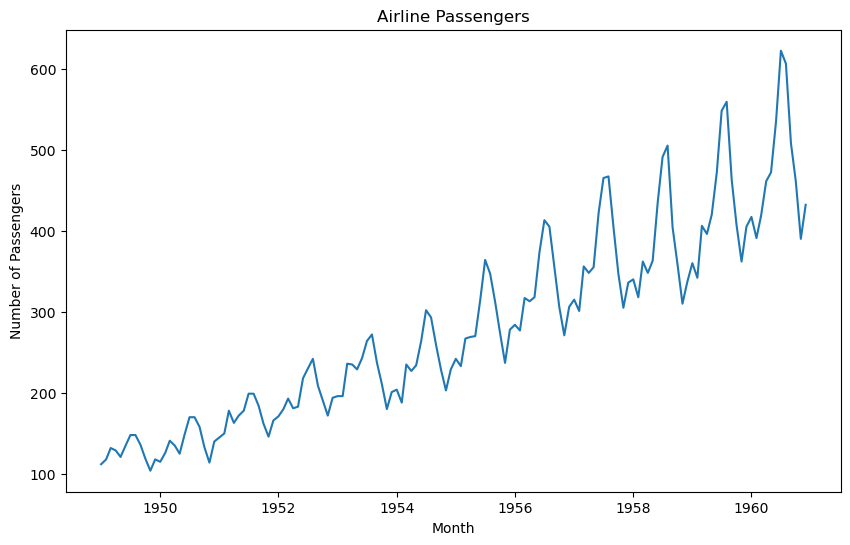

In [3]:
# Step 2: Visualize Data
plt.figure(figsize=(10, 6))
plt.plot(ts)
plt.title('Airline Passengers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.show()

In [8]:
# Define ADF test function to return results explicitly
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    adf_statistic = result[0]
    p_value = result[1]
    return adf_statistic, p_value

In [9]:
# Step 3: Stationarity Test (ADF Test)
print('Results of Augmented Dickey-Fuller Test:')
adf_statistic, p_value = adf_test(ts)
print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
if p_value > 0.05:
    print('Data is non-stationary. Applying differencing...')
    # Step 4: Differencing (if needed)
    ts_diff = ts.diff().dropna()  # Apply differencing to make the data stationary
    print('Results of Augmented Dickey-Fuller Test after differencing:')
    adf_statistic_diff, p_value_diff = adf_test(ts_diff)
    print('ADF Statistic after differencing:', adf_statistic_diff)
    print('p-value after differencing:', p_value_diff)
else:
    print('Data is already stationary.')

Results of Augmented Dickey-Fuller Test:
ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641
Data is non-stationary. Applying differencing...
Results of Augmented Dickey-Fuller Test after differencing:
ADF Statistic after differencing: -2.8292668241699994
p-value after differencing: 0.0542132902838255


the p-value is approximately 0.9919, which is much greater than 0.05. Therefore, we fail to reject the null hypothesis, suggesting that the time series is likely non-stationary.

In [13]:
# Perform grid search for best ARIMA model order
best_aic = np.inf
best_order = None
for p in range(5):
    for d in range(2):
        for q in range(5):
            try:
                model = ARIMA(ts, order=(p, d, q))
                fit_model = model.fit()
                aic = fit_model.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
            except:
                continue

print('Best ARIMA Order:', best_order)

C:\Users\manas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\manas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Usin

Best ARIMA Order: (4, 1, 4)


C:\Users\manas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
# Step 5: Model Selection (Use the differenced or original data depending on stationarity)
# Fit the ARIMA model with the best order
model = ARIMA(ts, order=best_order)
fit_model = model.fit()

C:\Users\manas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
# Step 7: Make Predictions
start = len(ts)
end = start + 11  # Predicting the next 12 months
pred = fit_model.predict(start=start, end=end, typ='levels')

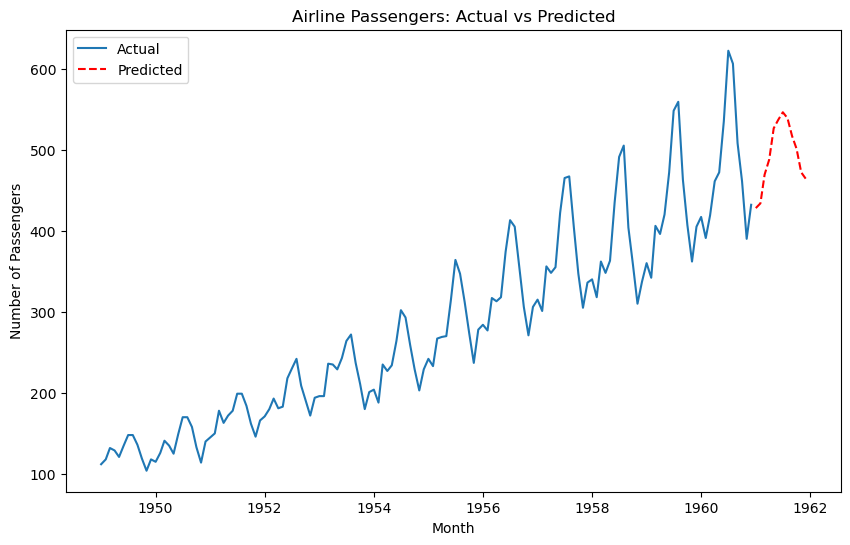

In [16]:
# Step 8: Visualize Predictions
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Actual')
plt.plot(pred, label='Predicted', linestyle='--', color='red')
plt.title('Airline Passengers: Actual vs Predicted')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [17]:
# Step 8: Print Actual and Predicted Values
print("Actual values:")
print(ts[-12:])  # Print last 12 months actual values
print("\nPredicted values:")
print(pred)  # Print predicted values


Actual values:
Month
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, dtype: int64

Predicted values:
1961-01-01    427.906404
1961-02-01    433.775568
1961-03-01    469.213694
1961-04-01    487.878804
1961-05-01    526.366414
1961-06-01    536.980199
1961-07-01    546.095346
1961-08-01    538.965616
1961-09-01    516.752170
1961-10-01    501.053584
1961-11-01    472.014876
1961-12-01    464.229726
Freq: MS, Name: predicted_mean, dtype: float64


In [18]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(ts[-12:], pred))
print('Root Mean Squared Error (RMSE):', rmse)


Root Mean Squared Error (RMSE): 48.17798810299935
